In [4]:
# Add current directory to path
import sys

import numpy as np

from pymatgen.core.structure import Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

import quesadilla.dynmat as dynmat
import quesadilla.symmetries as symmetries
from quesadilla.dynmat import fcq_to_dynmat

ModuleNotFoundError: No module named 'quesadilla.espresso_symm'

NameError: name 'prim' is not defined

In [7]:
material = "Si"
prim = Structure.from_file(f"../quesadilla/tests/data/{material}/POSCAR")
print(prim)
# TODO: move to routine for generating NDSCs
prim = SpacegroupAnalyzer(prim).get_primitive_standard_structure()
print(prim)

/Users/ashour/venvs/quesadilla_test2/lib/python3.12/site-packages/pymatgen/core/structure.py:3175: EncodingWarning: We strongly encourage explicit `encoding`, and we would use UTF-8 by default as per PEP 686
  with zopen(filename, mode="rt", errors="replace") as file:


Full Formula (Si2)
Reduced Formula: Si
abc   :   3.849279   3.849279   3.849279
angles:  60.000000  60.000000  60.000000
pbc   :       True       True       True
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Si    0.5   0.5   0.5
  1  Si    0.75  0.75  0.75
Full Formula (Si2)
Reduced Formula: Si
abc   :   3.849279   3.849279   3.849279
angles:  60.000000  60.000000  60.000000
pbc   :       True       True       True
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Si    1     0     0
  1  Si    0.25  0.25  0.25


In [8]:
prim[0].species_string

'Si'

In [8]:
T_sc, q_comm = dynmat.read_monserrat(f"../quesadilla/tests/data/{material}/monserrat")

In [9]:
import phonopy

nd_phonon = dynmat.get_nd_phonopy(f"../quesadilla/tests/data/{material}", [4,4,4], T_sc, q_comm)

Found 1 dynamical matrices at q = (np.float64(0.0), np.float64(0.0), np.float64(0.0))
Found 1 dynamical matrices at q = (np.float64(0.5), np.float64(0.0), np.float64(0.0))
Found 1 dynamical matrices at q = (np.float64(0.5), np.float64(0.5), np.float64(0.0))
Found 1 dynamical matrices at q = (np.float64(0.25), np.float64(0.0), np.float64(0.0))
Found 1 dynamical matrices at q = (np.float64(0.25), np.float64(0.25), np.float64(0.0))
Found 1 dynamical matrices at q = (np.float64(0.5), np.float64(0.25), np.float64(0.0))
Found 1 dynamical matrices at q = (np.float64(-0.25), np.float64(0.25), np.float64(0.0))
Found 1 dynamical matrices at q = (np.float64(-0.25), np.float64(0.5), np.float64(0.25))
Applying q-star to q = [0. 0. 0.]...
Applying q-star to q = [0.5 0.  0. ]...
Applying q-star to q = [0.5 0.5 0. ]...
Applying q-star to q = [0.25 0.   0.  ]...
Applying q-star to q = [0.25 0.25 0.  ]...
Applying q-star to q = [0.5  0.25 0.  ]...
     hi again, for verbosity I gotF
     hi again, for v

In [10]:
ref_phonon = phonopy.load(f"../quesadilla/tests/data/{material}/phonopy-diag.yaml")
ref_phonon.auto_band_structure(npoints=31)
nd_phonon.auto_band_structure(npoints=31)

/Users/ashour/venvs/quesadilla_test2/lib/python3.12/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/Users/ashour/venvs/quesadilla_test2/lib/python3.12/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/Users/ashour/venvs/quesadilla_test2/lib/python3.12/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/Users/ashour/venvs/quesadilla_test2/lib/python3.12/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/

(0.0, 0.8243187154390896)

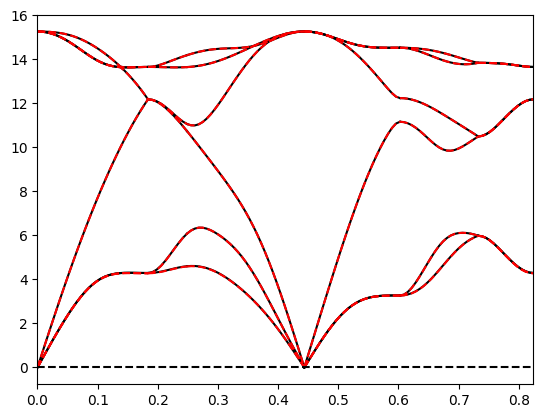

In [11]:
ref_bands = ref_phonon.get_band_structure_dict()["frequencies"]
nd_bands = nd_phonon.get_band_structure_dict()["frequencies"]
qpoints = nd_phonon.get_band_structure_dict()["distances"]

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for b, q in zip(ref_bands, qpoints):
    ax.plot(q, b, "k")
for b, q in zip(nd_bands, qpoints):
    ax.plot(q, b, "r", linestyle="--")

ax.axhline(0, color="k", linestyle="--")
ax.set_xlim(np.min(qpoints[0]), np.max(qpoints[-1]))